# 목차
## 1. 다중클래스 분류
- 무작위 데이터 셋으로 logistic regression 실험
- iris data logistic regression

## 2. 나이브베이지안
- 아이리스 데이터를 이용하여 테스트
- cancer data

## 3. 결정트리
- cancer data
- 결정트리 시각화
- 특성 중요도 확인
- 아이리스 데이터 품종분류

## 4. 랜덤포레스트
- 랜덤 포레스트 예제
- 랜덤 포레스트와 decision tree 비교
- random forest cancer data
- Gradientboosting cancer data


## 고찰 정리(특이사항 정리)
### 1. 다중 클래스 분류
- 이차원 평면에 y = ax1+ bx2 + c를 한 평면에 나타내기 위해서 공식을 살짝 바꿔준 것 같다. 그림에 나타난 선이 정확한 경계를 의미하지 않는다.

### 2. 나이브 베이지안
- 데이터가 연속적일 때는, 가우시안 분포를 가정한다

### 3. 결정트리
- make_moon 함수는 초승달 모양 클러스터를 만드는 함수
- DecisionTreeClassifier(random_state=0)에서 random은, feature가 최대치를 넘어가면, ramdom하게 뽑는 feature seed를 고정시킵니다
- bosting방법에서는 일부 특성을 무시하는 것을 볼 수 있음

In [1]:
# 1. 다중 클래스 분류
from sklearn.datasets import make_blobs
import mglearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from preamble import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


%matplotlib inline

In [2]:
#맥에서 폰트문제 해결하기
from matplotlib import rc
rc('font', family="AppleGothic")

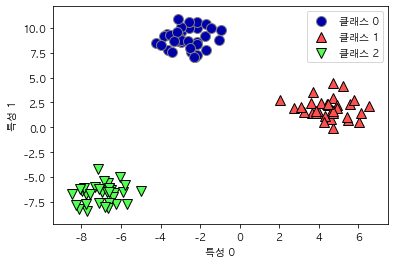

In [3]:
X, y = make_blobs(random_state = 42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

In [4]:
logr = LogisticRegression().fit(X,y)
print("계수 배열의 크기: ", logr.coef_.shape)
print("절편 배열의 크기: ", logr.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


In [5]:
logr.coef_

array([[-0.385,  0.629],
       [ 0.741, -0.177],
       [-0.356, -0.452]])

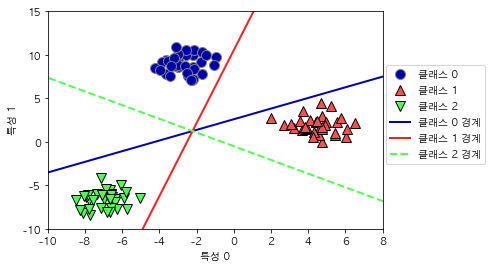

In [6]:
# multiclass auto
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept ,color in zip(logr.coef_, logr.intercept_,mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept)/coef[1], c=color)
    plt.ylim(-10,15)
    plt.xlim(-10,8)
    plt.xlabel("특성 0")
    plt.ylabel("특성 1")
    plt.legend(["클래스 0","클래스 1", "클래스 2", "클래스 0 경계","클래스 1 경계","클래스 2 경계"], loc=(1.01, 0.3))

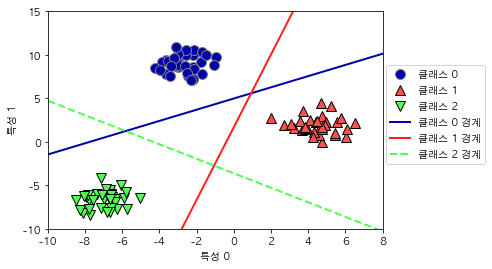

In [7]:
# multiclass ovr

logr = LogisticRegression(multi_class='ovr').fit(X,y)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept ,color in zip(logr.coef_, logr.intercept_,mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept)/coef[1], c=color)
    plt.ylim(-10,15)
    plt.xlim(-10,8)
    plt.xlabel("특성 0")
    plt.ylabel("특성 1")
    plt.legend(["클래스 0","클래스 1", "클래스 2", "클래스 0 경계","클래스 1 경계","클래스 2 경계"], loc=(1.01, 0.3))

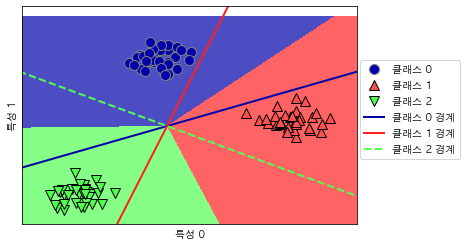

In [8]:
#2차원 모든 데이터에 대한 예측
# multiclass auto
logr = LogisticRegression().fit(X,y)
mglearn.plots.plot_2d_classification(logr, X, fill = True, alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept ,color in zip(logr.coef_, logr.intercept_,mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept)/coef[1], c=color)
    plt.ylim(-10,15)
    plt.xlim(-10,8)
    plt.xlabel("특성 0")
    plt.ylabel("특성 1")
    plt.legend(["클래스 0","클래스 1", "클래스 2", "클래스 0 경계","클래스 1 경계","클래스 2 경계"], loc=(1.01, 0.3))

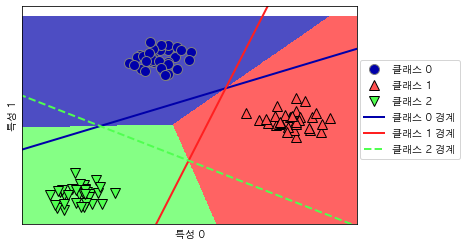

In [9]:
# multiclass ovr

logr = LogisticRegression(multi_class='ovr').fit(X,y)
mglearn.plots.plot_2d_classification(logr, X, fill = True, alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept ,color in zip(logr.coef_, logr.intercept_,mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept)/coef[1], c=color)
    plt.ylim(-10,15)
    plt.xlim(-10,8)
    plt.xlabel("특성 0")
    plt.ylabel("특성 1")
    plt.legend(["클래스 0","클래스 1", "클래스 2", "클래스 0 경계","클래스 1 경계","클래스 2 경계"], loc=(1.01, 0.3))

In [10]:
#iris data logistic regression

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn import datasets

In [12]:
iris_dataset = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'],random_state=0, test_size=0.4)
logr = LogisticRegression()
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\n테스트 세트의 정확도: {:.2f}".format(logr.score(X_test, y_test)))
print("Number of mislabeled points out of a total %d points : %d" %(X_test.shape[0], (y_test != y_pred).sum()))

[[16  0  0]
 [ 0 22  1]
 [ 0  4 17]]

테스트 세트의 정확도: 0.92
Number of mislabeled points out of a total 60 points : 5


In [13]:
print("predic: \n", logr.predict(X_test[:30]))

predic: 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0]


In [14]:
print("probability: \n", logr.predict_proba(X_test[:30]))

probability: 
 [[0.    0.123 0.877]
 [0.015 0.968 0.017]
 [0.987 0.013 0.   ]
 [0.    0.041 0.959]
 [0.971 0.029 0.   ]
 [0.    0.012 0.988]
 [0.982 0.018 0.   ]
 [0.004 0.727 0.269]
 [0.002 0.761 0.236]
 [0.026 0.932 0.042]
 [0.    0.319 0.681]
 [0.01  0.784 0.206]
 [0.006 0.838 0.156]
 [0.004 0.79  0.205]
 [0.006 0.761 0.233]
 [0.983 0.017 0.   ]
 [0.009 0.796 0.195]
 [0.014 0.9   0.086]
 [0.965 0.035 0.   ]
 [0.985 0.015 0.   ]
 [0.002 0.339 0.659]
 [0.014 0.768 0.218]
 [0.945 0.055 0.   ]
 [0.972 0.028 0.   ]
 [0.002 0.536 0.462]
 [0.994 0.006 0.   ]
 [0.955 0.045 0.   ]
 [0.014 0.901 0.085]
 [0.139 0.858 0.004]
 [0.962 0.038 0.   ]]


In [15]:
# 나이브 베이지안

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [17]:
#아이리스 데이터 테스트
iris_dataset = load_iris()
test_split_list = [0.4, 0.3, 0.2, 0.1]
for s in test_split_list:
    X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset["target"], random_state =0, test_size=s)
    
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    nErrors = (y_test != y_pred).sum()
    accuracy = 1.0 - nErrors/y_test.shape[0]
    print("테스트 size 비율:", str(s))
    print("Accuracy: ", accuracy)
    print("Number of mislabeled points out of a total %d points %d" %(X_test.shape[0], (y_test != y_pred).sum()))
    print()

테스트 size 비율: 0.4
Accuracy:  0.9333333333333333
Number of mislabeled points out of a total 60 points 4

테스트 size 비율: 0.3
Accuracy:  1.0
Number of mislabeled points out of a total 45 points 0

테스트 size 비율: 0.2
Accuracy:  0.9666666666666667
Number of mislabeled points out of a total 30 points 1

테스트 size 비율: 0.1
Accuracy:  0.9333333333333333
Number of mislabeled points out of a total 15 points 1



In [18]:
# cancer data test 

In [19]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
test_split_list = [0.4, 0.3, 0.2, 0.1]
for s in test_split_list:
    X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state =0, test_size=s)
    
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    nErrors = (y_test != y_pred).sum()
    accuracy = 1.0 - nErrors/y_test.shape[0]
    print("테스트 size 비율:", str(s))
    print("Accuracy: ", accuracy)
    print("내장 accuracy함수: ", classifier.score(X_test, y_test))
    print("Number of mislabeled points out of a total %d points %d" %(X_test.shape[0], (y_test != y_pred).sum()))
    print()

테스트 size 비율: 0.4
Accuracy:  0.9342105263157895
내장 accuracy함수:  0.9342105263157895
Number of mislabeled points out of a total 228 points 15

테스트 size 비율: 0.3
Accuracy:  0.9239766081871346
내장 accuracy함수:  0.9239766081871345
Number of mislabeled points out of a total 171 points 13

테스트 size 비율: 0.2
Accuracy:  0.9210526315789473
내장 accuracy함수:  0.9210526315789473
Number of mislabeled points out of a total 114 points 9

테스트 size 비율: 0.1
Accuracy:  0.9122807017543859
내장 accuracy함수:  0.9122807017543859
Number of mislabeled points out of a total 57 points 5



In [20]:
# 결정트리

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons

In [22]:
# 기본 setting
X,y = make_moons(n_samples= 100, noise = 0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =0)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도:{:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도:0.840


In [23]:
# 깊이제한 setting
X,y = make_moons(n_samples= 100, noise = 0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y ,random_state =0)

tree = DecisionTreeClassifier(random_state=0, max_depth=4)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도:{:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.933
테스트 세트 정확도:0.800


In [24]:
#cancer data에 결정트리 적용
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,stratify=cancer.target ,random_state =42)
print("X_train.shape: {}".format(X_train.shape), "X_test.shape".format(X_test.shape))
print()
for max_depth in [1,4,8]:
    tree = DecisionTreeClassifier(random_state=0, max_depth=max_depth)
    tree.fit(X_train, y_train)
    print("max_depth= {}".format(max_depth))
    print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
    print("테스트 세트 정확도:{:.3f}".format(tree.score(X_test, y_test)))
    print()
    
    

X_train.shape: (426, 30) X_test.shape

max_depth= 1
훈련 세트 정확도: 0.923
테스트 세트 정확도:0.923

max_depth= 4
훈련 세트 정확도: 0.988
테스트 세트 정확도:0.951

max_depth= 8
훈련 세트 정확도: 1.000
테스트 세트 정확도:0.937



In [25]:
#그래프 출력
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

export_graphviz(tree, out_file="tree.dot", class_names = ["양성", "음성"], feature_names=cancer.feature_names, impurity= False, filled=True)

In [26]:
import graphviz

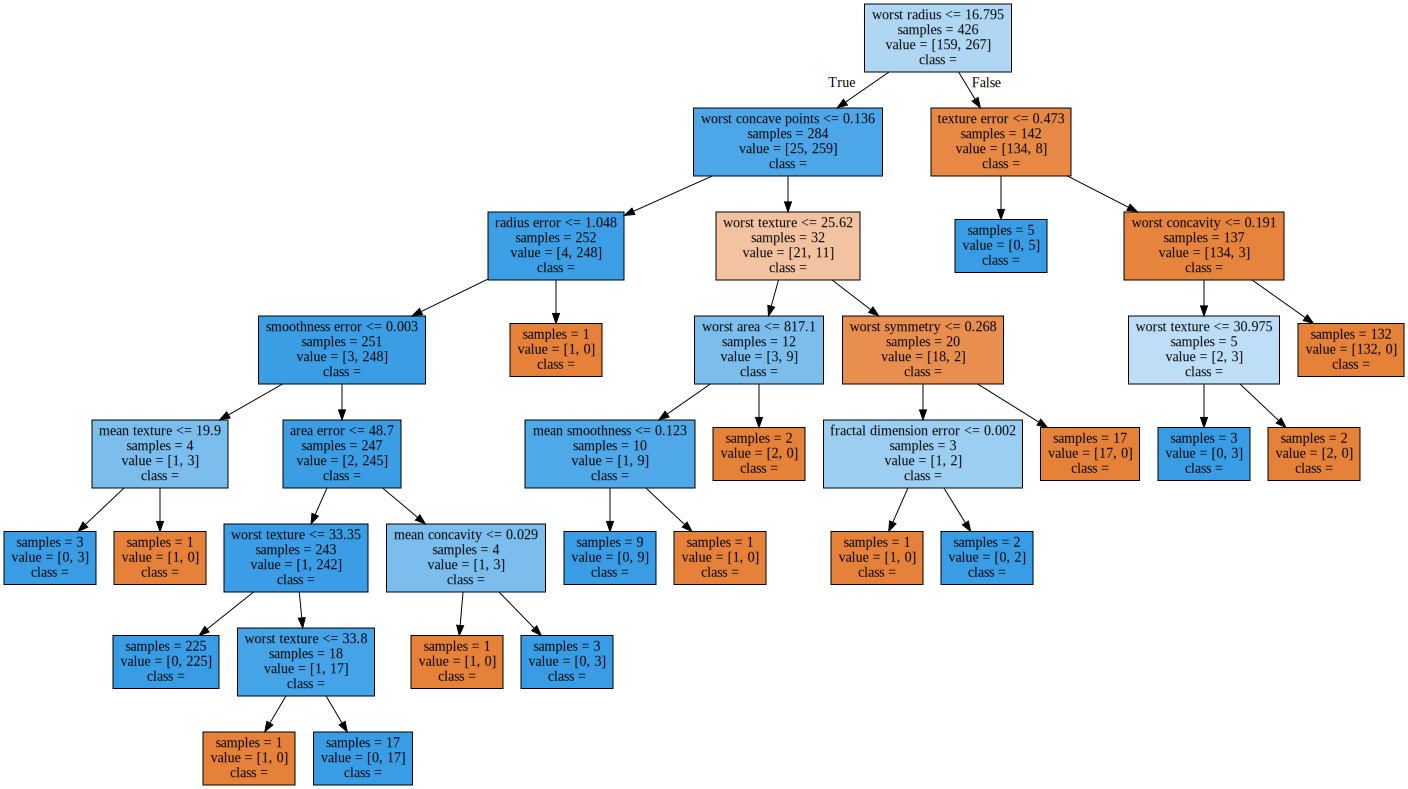

In [27]:
with open('tree.dot',encoding ='UTF8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [28]:
# 특성의 중요도 확인

In [29]:
print("특성 중요도: \n{}".format(tree.feature_importances_))

특성 중요도: 
[0.    0.008 0.    0.    0.009 0.    0.008 0.    0.    0.    0.01  0.046
 0.    0.002 0.002 0.    0.    0.    0.    0.007 0.695 0.054 0.    0.014
 0.    0.    0.017 0.117 0.011 0.   ]


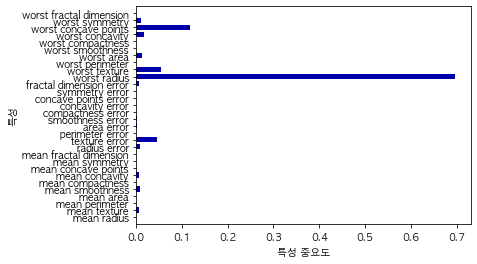

In [30]:
#plot으로 찍어보기
def plot_feature_importances_cancer(model):
    n_feature = cancer.data.shape[1]
    plt.barh(range(n_feature), model.feature_importances_, align="center") #가로 막대그래프를 그리는 함수
    plt.yticks(np.arange(n_feature), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_feature)
    
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


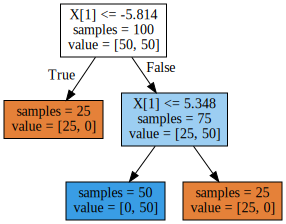

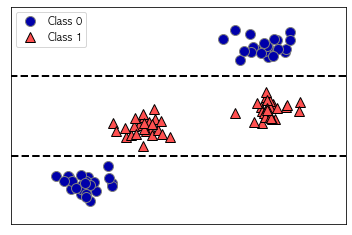

In [31]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

In [32]:
#아이리스 데이터 품종분류
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier


In [33]:
iris = load_iris()
X = iris.data[:,2:] # 꽃잎 길이와 넓이
y = iris.target

In [34]:
tree_clf = DecisionTreeClassifier(max_depth =2, random_state=42)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=42)

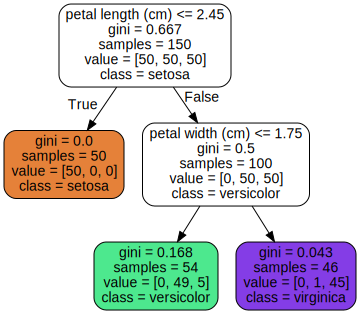

In [35]:
export_graphviz(tree_clf, out_file="iris_tree.dot", feature_names=iris.feature_names[2:], class_names=iris.target_names, rounded =True, filled =True)
with open('iris_tree.dot',encoding ='UTF8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

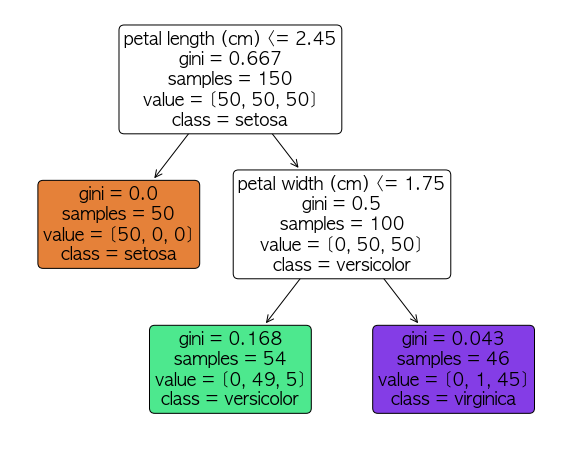

In [36]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,8))
plot_tree(tree_clf, filled = True, rounded= True, max_depth=2, feature_names=iris.feature_names[2:], class_names=iris.target_names)
plt.show()

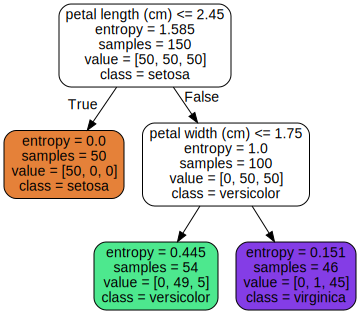

In [37]:
#엔트로피로 분할
tree_clf = DecisionTreeClassifier(criterion='entropy',max_depth =2, random_state=42)
tree_clf.fit(X,y)
export_graphviz(tree_clf, out_file="iris_tree1.dot", feature_names=iris.feature_names[2:], class_names=iris.target_names, rounded =True, filled =True)
with open('iris_tree1.dot',encoding ='UTF8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [38]:
#랜덤 포레스트 기본
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import cross_val_score

X, y = make_moons(n_samples= 100, noise=0.25 ,random_state =3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)
print("테스트 세트 정확도: {:.3f}\n".format(forest.score(X_test, y_test)))

cvscores = cross_val_score(forest, X, y, cv=5)
print("테스트 세트 정확도 CV=5: {:.3f}\n".format(cvscores.mean()))

cvscores = cross_val_score(forest, X, y, cv=10)
print("테스트 세트 정확도 CV=10: {:.3f}\n".format(cvscores.mean()))

테스트 세트 정확도: 0.920

테스트 세트 정확도 CV=5: 0.860

테스트 세트 정확도 CV=10: 0.840



In [39]:
# 랜덤 포레스트와 decision tree 비교
X, y = make_moons(n_samples= 100, noise=0.25 ,random_state =3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=100)
forest.fit(X_train, y_train)
print("테스트 세트 정확도: {:.3f}\n".format(forest.score(X_test, y_test)))

cvscores = cross_val_score(forest, X, y, cv=5)
print("테스트 세트 정확도 CV=5: {:.3f}\n".format(cvscores.mean()))

cvscores = cross_val_score(forest, X, y, cv=10)
print("테스트 세트 정확도 CV=10: {:.3f}\n".format(cvscores.mean()))
print(cvscores)

테스트 세트 정확도: 0.880

테스트 세트 정확도 CV=5: 0.850

테스트 세트 정확도 CV=10: 0.850

[1.  0.9 0.9 0.9 0.9 0.9 0.4 1.  0.8 0.8]


In [40]:
# cancer data
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}\n".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}\n".format(forest.score(X_test, y_test)))

cvscores = cross_val_score(forest, X, y, cv=5)
print("테스트 세트 정확도 CV=5: {:.3f}\n".format(cvscores.mean()))

cvscores = cross_val_score(forest, X, y, cv=10)
print("테스트 세트 정확도 CV=10: {:.3f}\n".format(cvscores.mean()))

훈련 세트 정확도: 1.000

테스트 세트 정확도: 0.972

테스트 세트 정확도 CV=5: 0.920

테스트 세트 정확도 CV=10: 0.910



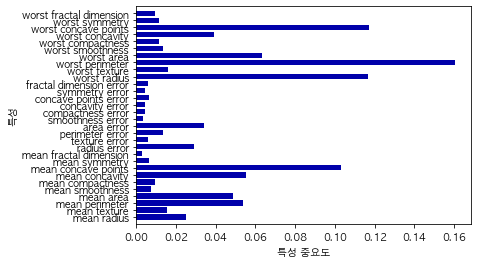

In [41]:
# 특성의 중요도 파악
plot_feature_importances_cancer(forest)

In [42]:
# Gradientboosting cancer data
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}\n".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}\n".format(gbrt.score(X_test, y_test)))

cvscores = cross_val_score(gbrt, X, y, cv=5)
print("테스트 세트 정확도 CV=5: {:.3f}\n".format(cvscores.mean()))

cvscores = cross_val_score(gbrt, X, y, cv=10)
print("테스트 세트 정확도 CV=10: {:.3f}\n".format(cvscores.mean()))

훈련 세트 정확도: 1.000

테스트 세트 정확도: 0.965

테스트 세트 정확도 CV=5: 0.850

테스트 세트 정확도 CV=10: 0.890



In [43]:
# Gradientboosting cancer data, 트리 최대 깊이 조정
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0, max_depth =1)
gbrt.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}\n".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}\n".format(gbrt.score(X_test, y_test)))

cvscores = cross_val_score(gbrt, X, y, cv=5)
print("테스트 세트 정확도 CV=5: {:.3f}\n".format(cvscores.mean()))

cvscores = cross_val_score(gbrt, X, y, cv=10)
print("테스트 세트 정확도 CV=10: {:.3f}\n".format(cvscores.mean()))

훈련 세트 정확도: 0.991

테스트 세트 정확도: 0.972

테스트 세트 정확도 CV=5: 0.870

테스트 세트 정확도 CV=10: 0.890



In [44]:
# Gradientboosting cancer data, 학습률 조정
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}\n".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}\n".format(gbrt.score(X_test, y_test)))

cvscores = cross_val_score(gbrt, X, y, cv=5)
print("테스트 세트 정확도 CV=5: {:.3f}\n".format(cvscores.mean()))

cvscores = cross_val_score(gbrt, X, y, cv=10)
print("테스트 세트 정확도 CV=10: {:.3f}\n".format(cvscores.mean()))

훈련 세트 정확도: 0.988

테스트 세트 정확도: 0.965

테스트 세트 정확도 CV=5: 0.860

테스트 세트 정확도 CV=10: 0.870



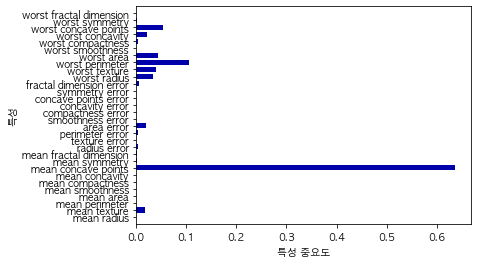

In [45]:
# 특성의 중요도 파악
plot_feature_importances_cancer(gbrt)